# Importing necessary library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

# Loading the spam dataset

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Info about the datasets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Drop out the columns Unnamed 2, Unnamed 3, Unnamed 4

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Rename the column name

In [7]:
df.rename(columns={'v1': 'label','v2':'text'},inplace=True)

In [8]:
df.columns

Index(['label', 'text'], dtype='object')

# Calculating the number of ham and spam value in datasets

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

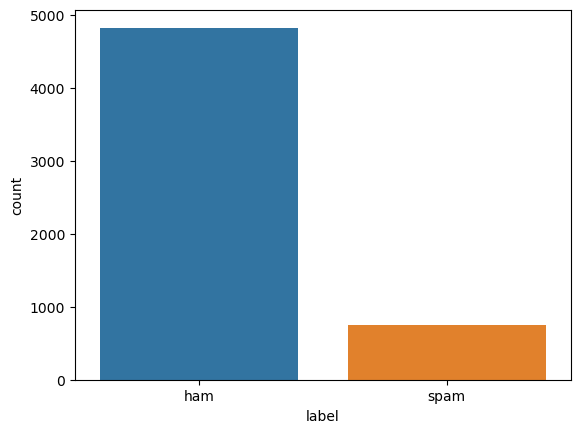

In [10]:
sns.countplot(x='label',data=df)

# 

# Data Preprocessing

## checking the text value 

In [11]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

## cleaning the text 

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string,re

In [63]:
def clean_text(text):
    text = text.lower() # converting the entire text into lower case
    text = "".join([word for word in text if word not in string.punctuation]) # removing the punctuation from the text
    words = re.split('\W',text)# seperating the word from the text and converting into list
    text = [word for word in words if word not in stopwords.words('english')] # removing the stopword from the text
    return text

# Creating the text into vectorizer form using TfidVectorizer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
tfid_vector = TfidfVectorizer(analyzer=clean_text)
text_transform = tfid_vector.fit_transform(df['text'])

In [66]:
text_transform

<5572x9395 sparse matrix of type '<class 'numpy.float64'>'
	with 51105 stored elements in Compressed Sparse Row format>

In [67]:
print(text_transform)

  (0, 8886)	0.1897972404129813
  (0, 1179)	0.3328768943327282
  (0, 3833)	0.15637942028705787
  (0, 2210)	0.2812157454836214
  (0, 1874)	0.3177669769222775
  (0, 3016)	0.19731991212206204
  (0, 4823)	0.2812157454836214
  (0, 9120)	0.2295545966345145
  (0, 3873)	0.18527465020848258
  (0, 5644)	0.18029851718516762
  (0, 1876)	0.2812157454836214
  (0, 1412)	0.2531259556287681
  (0, 2494)	0.2577902404588279
  (0, 6396)	0.2603613040823829
  (0, 4664)	0.3328768943327282
  (0, 3776)	0.15134204543956442
  (1, 5992)	0.5356050320303347
  (1, 8551)	0.1965077811821439
  (1, 9016)	0.4229284479747434
  (1, 4632)	0.5131236718683402
  (1, 4862)	0.4000945017495694
  (1, 5960)	0.2688344407445697
  (2, 73)	0.23183680257116945
  (2, 1265)	0.1674787110187263
  (2, 6738)	0.23183680257116945
  :	:
  (5568, 3795)	0.311771694488399
  (5568, 1443)	0.37760482542763296
  (5568, 4169)	0.3138841617806791
  (5569, 7937)	0.514332181185127
  (5569, 7562)	0.514332181185127
  (5569, 6322)	0.514332181185127
  (5569, 5536

# 

# Splitting the data into training and testing part

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(text_transform,df.label,test_size=0.2,random_state=42)

## Checking the shape of the dataset after spliting

In [70]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4457, 9395), (1115, 9395), (4457,), (1115,))

# 

# Model Selection 

In [71]:
model_result = {}

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [73]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [74]:
y_pred = log_clf.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.9434977578475336


In [75]:
model_result['Logistic'] = accuracy_score(y_test,y_pred)

## Learning curve

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

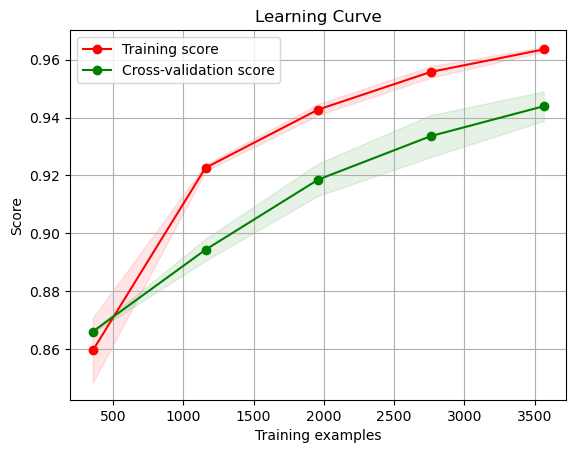

In [76]:
skplt.estimators.plot_learning_curve(log_clf,x_train,y_train)

## Confusion matrix

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

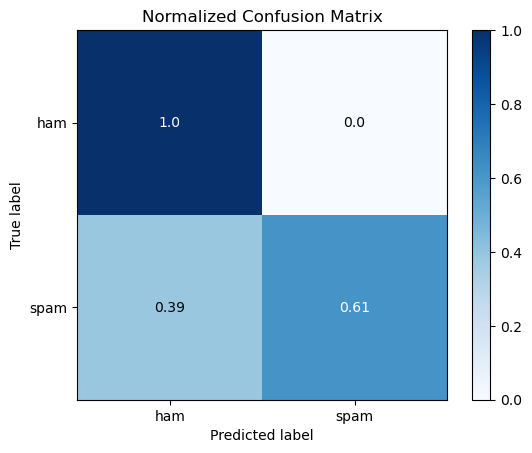

In [77]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True)

# 

## Support Vector Machine

In [78]:
from sklearn.svm import SVC

In [79]:
svm_clf = SVC()
svm_clf.fit(x_train,y_train)

SVC()

In [80]:
y_pred = svm_clf.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.9695067264573991


## Learning Curve

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

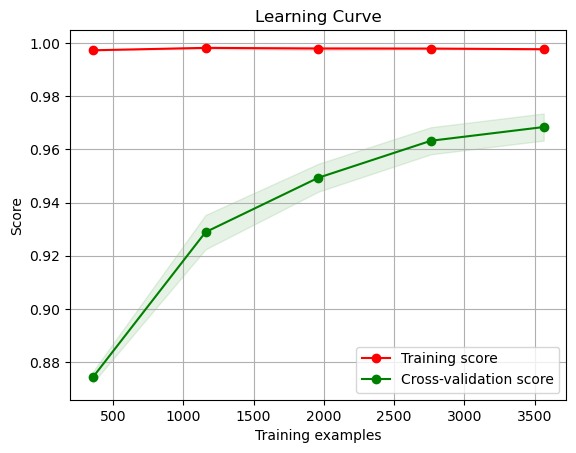

In [81]:
skplt.estimators.plot_learning_curve(svm_clf,x_train,y_train)

## Confusion matrix

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

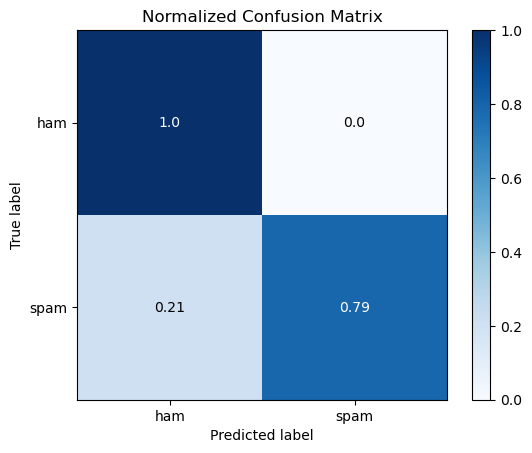

In [82]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True)

In [83]:
model_result['SVM'] = accuracy_score(y_test,y_pred)

# 

## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred = rnd_clf.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.9757847533632287


## Learning Curve

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

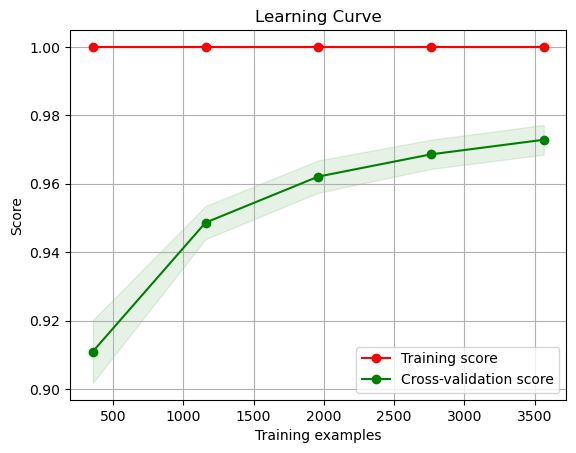

In [87]:
skplt.estimators.plot_learning_curve(rnd_clf,x_train,y_train)

## Consfusion matrix

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

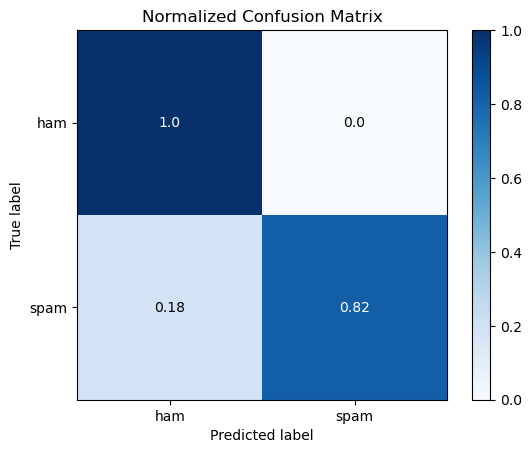

In [88]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True)

In [89]:
model_result['Random Forest'] = accuracy_score(y_test,y_pred)

## 

## Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
naive_clf = GaussianNB()
naive_clf.fit(x_train.toarray(),y_train)

GaussianNB()

In [92]:
y_pred = naive_clf.predict(x_test.toarray())
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.8869955156950673


## Learning Curve

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

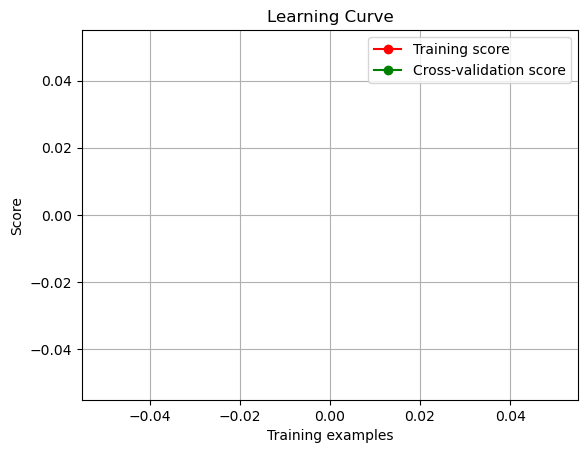

In [93]:
skplt.estimators.plot_learning_curve(naive_clf,x_train,y_train)

## Confusion matrix

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

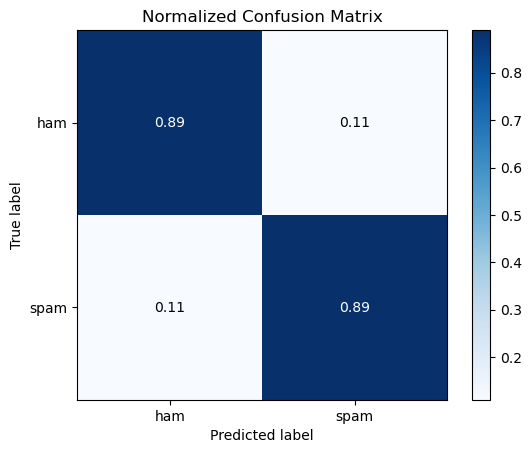

In [94]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True)

In [95]:
model_result['Naive Bayes'] = accuracy_score(y_test,y_pred)

## Accuracy of the model

In [98]:
model_result

{'Logistic': 0.9434977578475336,
 'SVM': 0.9695067264573991,
 'Random Forest': 0.9757847533632287,
 'Naive Bayes': 0.8869955156950673}

In [103]:
data = pd.DataFrame(columns=['Model','Accuracy'])
data['Model'] = model_result.keys()
data['Accuracy'] = model_result.values()

In [105]:
data

,Model,Accuracy
0,Logistic,0.943498
1,SVM,0.969507
2,Random Forest,0.975785
3,Naive Bayes,0.886996


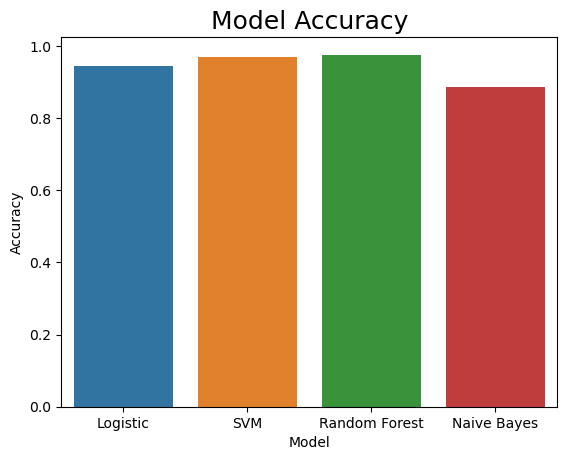

In [109]:
sns.barplot(x='Model',y='Accuracy',data=data)
plt.title('Model Accuracy',fontsize=18)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()